In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
file_paths = ['GroupLife/GL2011_2012_CLAIMS.xlsx',
              'GroupLife/GL2011_2012_CLAIMS_A.xlsx',
              'GroupLife/GL2013_2014_CLAIMS.xlsx', 
              'GroupLife/GL_2015_2016_CLAIMS.xlsx',
              'GroupLife/GL_2017_CLAIMS.xlsx',
             ]

for file_name in file_paths:
    #Check in the path to pick the file name
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, : 16]
    
    
    #Name the file columns in each of the datasets
    name.columns = ['Name_of_Scheme', 'Policy_Number', 
              'Membership_Number', 'Rider', 'Gender', 'Policy_Type', 
              'claim_payable', 'sum_assured', 'amount_paid', 
              'Date_of_Birth', 'Issue_Date', 'Effective_Date', 
              'date_of_death', 'date_reported', 'date_claim_paid', 'cause_of_death']
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date', 
          'Effective_Date', 
          'date_of_death', 
          'date_reported',
          'date_claim_paid']] = name[['Date_of_Birth', 
                                      'Issue_Date', 
                                      'Effective_Date', 
                                      'date_of_death', 
                                      'date_reported',
                                      'date_claim_paid']].apply(pd.to_datetime,
                                                            format='%Y-%m-%d',
                                                            errors='coerce')

    # Convert the Level of Cover to Numeric
    name[['claim_payable', 
          'sum_assured', 
          'amount_paid']] = name[['claim_payable', 
                                           'sum_assured',
                                           'amount_paid']].apply(pd.to_numeric, 
                                                                           downcast = 'signed', 
                                                                           errors='coerce')
    
    
#     # Create the Year Column 
#     name['year']= name['Effective_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")
    
    # create column for period between date of death and date reported
    name['reporting_period']=(name['date_reported'] - name['date_of_death']).astype('timedelta64[D]')
    
    # create column for period date of death and payment date
    name['payment_period']=(name['date_claim_paid'] - name['date_of_death']).astype('timedelta64[D]')
    
    # Create reporting period Column
    bins = [0, 90, 180, 270, 365,
            455, 545, 635, 730, 
            820, 910, 1000, 1095,
            5000]
    labels = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36,
              'After 3 years']
    

    name ['reporting_delay'] = pd.cut(name['reporting_period'], bins = bins, labels=labels, right = False )
    
    # Create paymement period Column
    bins = [0, 90, 180, 270, 365,
            455, 545, 635, 730, 
            820, 
            5000]
    labels = [3, 6, 9, 12, 
              15, 18, 21, 24, 
              27, 'After 2.25 yrs']
    name ['payment_delay'] = pd.cut(name['payment_period'], bins = bins, labels=labels, right = False )
    
    
    
    # Delete Empty Rows
    name = name.dropna(thresh=8)
    
    # Fill empty values on the year column
    name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)
    #print(name.sample(10))
    
    

(2282, 20)
(1614, 20)
(21804, 20)
(17444, 20)
(11511, 20)


In [3]:
# Concatenate the datasets into one dataframe
gl_claims = pd.concat([GL2011_2012_CLAIMS, 
                       GL2011_2012_CLAIMS_A, 
                       GL2013_2014_CLAIMS, 
                       GL_2015_2016_CLAIMS, 
                       GL_2017_CLAIMS,
                      ], 
               ignore_index=True)

print(gl_claims.shape)
gl_claims

(54655, 20)


,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,claim_payable,sum_assured,amount_paid,Date_of_Birth,Issue_Date,Effective_Date,date_of_death,date_reported,date_claim_paid,cause_of_death,reporting_period,payment_period,reporting_delay,payment_delay
0,member 1,1,25,FUNERAL COVER,M,GROUP LIFE,3238128.00,3238128.00,3238128.00,1960-01-01,2013-12-01,2013-12-01,2012-11-12,2012-12-18,2013-03-25,DEATH,36.0,133.0,3,6
1,member 1,1,25,FUNERAL COVER,M,GROUP LIFE,4603968.00,4603968.00,4603968.00,1960-01-01,2013-12-01,2013-12-01,2012-11-02,2012-11-21,2013-04-30,DEATH,19.0,179.0,3,6
2,member 1,1,25,FUNERAL COVER,M,GROUP LIFE,50000.00,50000.00,50000.00,1960-01-01,2013-03-01,2013-03-01,2012-08-11,2012-09-06,2013-02-05,DEATH,26.0,178.0,3,6
3,member 1,1,25,FUNERAL COVER,F,GROUP LIFE,204800.00,204800.00,204800.00,1960-01-01,2013-07-01,2013-07-01,2012-05-25,2012-06-25,2013-03-21,DEATH,31.0,300.0,3,12
4,member 1,1,25,FUNERAL COVER,F,GROUP LIFE,100000.00,100000.00,100000.00,1960-01-01,2013-07-01,2013-07-01,2012-11-01,2012-11-07,2013-10-30,DEATH,6.0,363.0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54650,1,Group Life,95924,DEATH,M,GROUP CREDIT,112875.00,112875.00,112875.00,2003-07-13,2016-06-01,2016-06-01,2017-02-21,2017-04-12,2017-07-04,NATURAL - UNKNOWN,50.0,133.0,3,6
54651,1,Group Life,95924,DEATH,M,GROUP CREDIT,29770.00,29770.00,29770.00,2003-07-13,2015-10-03,2015-10-03,2016-04-11,2016-06-29,2017-02-13,NATURAL - UNKNOWN,79.0,308.0,3,12
54652,1,Group Life,95924,DEATH,F,GROUP CREDIT,32512.00,32512.00,32512.00,2003-07-13,2015-10-03,2015-10-03,2015-12-21,2016-03-08,2017-05-15,NATURAL - UNKNOWN,78.0,511.0,3,18
54653,1,Group Life,95924,LAST EXPENSE,M,GROUP CREDIT,50000.00,50000.00,50000.00,2003-07-13,2016-01-01,2016-01-01,2016-10-20,2017-01-13,2017-01-13,NATURAL - UNKNOWN,85.0,85.0,3,3


In [4]:
GL2011_2012_CLAIMS

,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,claim_payable,sum_assured,amount_paid,Date_of_Birth,Issue_Date,Effective_Date,date_of_death,date_reported,date_claim_paid,cause_of_death,reporting_period,payment_period,reporting_delay,payment_delay
7,member 1,1,25.0,FUNERAL COVER,M,GROUP LIFE,3238128.0,3238128.0,3238128.0,1960-01-01,2013-12-01,2013-12-01,2012-11-12,2012-12-18,2013-03-25,DEATH,36.0,133.0,3,6
8,member 1,1,25.0,FUNERAL COVER,M,GROUP LIFE,4603968.0,4603968.0,4603968.0,1960-01-01,2013-12-01,2013-12-01,2012-11-02,2012-11-21,2013-04-30,DEATH,19.0,179.0,3,6
9,member 1,1,25.0,FUNERAL COVER,M,GROUP LIFE,50000.0,50000.0,50000.0,1960-01-01,2013-03-01,2013-03-01,2012-08-11,2012-09-06,2013-02-05,DEATH,26.0,178.0,3,6
10,member 1,1,25.0,FUNERAL COVER,F,GROUP LIFE,204800.0,204800.0,204800.0,1960-01-01,2013-07-01,2013-07-01,2012-05-25,2012-06-25,2013-03-21,DEATH,31.0,300.0,3,12
11,member 1,1,25.0,FUNERAL COVER,F,GROUP LIFE,100000.0,100000.0,100000.0,1960-01-01,2013-07-01,2013-07-01,2012-11-01,2012-11-07,2013-10-30,DEATH,6.0,363.0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,Member 146,GL/2005/47,127.0,100000,F,GROUP LIFE,1801288.0,1801288.0,100000.0,1971-01-01,2010-07-01,2010-07-01,2011-05-21,2011-05-25,2011-05-31,ILLNESS,4.0,10.0,3,3
2450,Member 146,GL/2005/47,127.0,100000,M,GROUP LIFE,1315382.0,1315382.0,100000.0,1959-01-01,2011-07-01,2011-07-01,2011-09-08,2011-09-12,2011-09-14,SEVERE WASTING DUE TO HIV/AIDS DUE TO HYPOSTAT...,4.0,6.0,3,3
2451,Member 146,GL/2005/47,127.0,100000,F,GROUP LIFE,1101040.0,1101040.0,1101040.0,1959-06-01,2010-07-01,2010-07-01,2011-04-03,2011-04-13,2011-09-14,CARDIOPULMONARY ARREST DUE TO SEPTICAEMIA SHOC...,10.0,6.0,3,3
2452,Member 146,GL/2005/47,127.0,100000,F,GROUP LIFE,2102860.0,2904004.0,2002860.0,1960-01-01,2010-07-01,2010-07-01,2011-06-09,2011-06-13,2011-09-14,CARDIO VASCULAR COLLAPSE DUE TO INFARCTIVE STR...,4.0,6.0,3,3


In [5]:
GL2011_2012_CLAIMS_A

,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,claim_payable,sum_assured,amount_paid,Date_of_Birth,Issue_Date,Effective_Date,date_of_death,date_reported,date_claim_paid,cause_of_death,reporting_period,payment_period,reporting_delay,payment_delay
7,1.0,NaN,3.0,LE,Female,LE,532000.0,100000.0,100000.0,1969-01-01,2010-10-01,2011-10-01,2011-01-27,2011-01-19,2011-02-02,BRAIN ABCESS,-8.0,6.0,3,3
8,1.0,NaN,3.0,LE,Female,LE,532000.0,100000.0,100000.0,1969-01-01,2010-05-01,2011-10-01,2011-02-12,2011-02-14,2011-02-15,BRAIN ABCESS,2.0,3.0,3,3
9,1.0,NaN,3.0,LE,Female,LE,532000.0,100000.0,100000.0,1969-01-01,2011-01-01,2011-10-01,2011-02-09,2011-02-14,2011-02-15,AIDS,5.0,6.0,3,3
10,1.0,NaN,3.0,LE,Female,LE,532000.0,50000.0,50000.0,1969-01-01,2010-08-17,2011-10-01,2011-03-03,2011-03-11,2011-03-16,AIDS,8.0,13.0,3,3
11,1.0,NaN,3.0,LE,Female,LE,532000.0,100000.0,100000.0,1969-01-01,2011-04-01,2011-10-01,2011-04-12,2011-04-14,2011-04-20,HIV,2.0,8.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,92.0,NaN,3.0,Last Expense,m,GL,4306680.0,4306680.0,4306680.0,1967-10-31,2011-04-01,2011-04-01,2011-05-01,2011-05-01,2011-09-12,heart attack,0.0,134.0,3,6
1733,92.0,NaN,3.0,Last Expense,m,GL,75000.0,75000.0,75000.0,1967-10-31,2010-11-01,2010-11-01,2011-02-14,2011-02-21,2011-02-23,cardiorespiratory arrest due to cancer of the ...,7.0,9.0,3,3
1734,92.0,NaN,3.0,Last Expense,m,GL,40000.0,40000.0,40000.0,1947-01-10,2011-01-01,2011-01-01,2011-04-17,2011-10-26,2011-11-17,sudden death,192.0,214.0,9,9
1735,92.0,NaN,3.0,Last Expense,m,GL,40000.0,40000.0,40000.0,1961-04-18,2011-01-01,2011-01-01,2011-10-25,2011-11-24,2011-12-02,road accident- internal bleeding,30.0,38.0,3,3


In [6]:
GL2013_2014_CLAIMS

,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,claim_payable,sum_assured,amount_paid,Date_of_Birth,Issue_Date,Effective_Date,date_of_death,date_reported,date_claim_paid,cause_of_death,reporting_period,payment_period,reporting_delay,payment_delay
7,1,1.0,NaN,LE,M,CL,25000.0,25000.0,25000.0,1969-01-08,2010-01-01,2010-01-01,2013-01-09,2013-12-23,2013-12-31,CIRCULATORY DISEASE,348.0,356.0,12,12
8,1,1.0,NaN,LE,F,CL,25000.0,25000.0,25000.0,1969-01-08,2010-01-01,2010-01-01,2013-09-15,2013-10-01,2013-10-04,CIRCULATORY DISEASE,16.0,19.0,3,3
9,1,1.0,NaN,DEATH,F,CL,58968.0,58968.0,58968.0,1969-01-08,2010-01-01,2010-01-01,2013-09-15,2013-10-01,2013-12-23,CIRCULATORY DISEASE,16.0,99.0,3,6
10,1,1.0,NaN,LE,M,CL,25000.0,25000.0,25000.0,1969-01-08,2010-01-01,2010-01-01,2012-12-24,2013-01-15,2013-01-21,CIRCULATORY DISEASE,22.0,28.0,3,3
11,1,1.0,NaN,DEATH,M,CL,6829.0,6829.0,6829.0,1969-01-08,2010-01-01,2010-01-01,2012-12-24,2013-01-15,2013-04-08,CIRCULATORY DISEASE,22.0,105.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24848,member 428,35.0,NaN,CL Data Scheme - PTD,Male,EB Group Life Cover,0.0,400000.0,866100.0,1977-01-01,2014-08-01,2014-08-01,2014-12-12,2014-12-31,2014-12-04,DEATH,19.0,1107.0,3,After 2.25 yrs
24849,member 429,35.0,NaN,CL Data Scheme - PTD,Male,EB Group Life Cover,0.0,400000.0,886320.0,1977-01-01,2014-08-01,2014-08-01,2014-09-30,2014-12-10,2014-12-04,DEATH,71.0,1107.0,3,After 2.25 yrs
24850,member 430,35.0,NaN,CL Data Scheme - PTD,Male,EB Group Life Cover,0.0,400000.0,581100.0,1977-01-01,2014-08-01,2014-08-01,2014-12-05,2014-12-10,2014-12-04,DEATH,5.0,1107.0,3,After 2.25 yrs
24851,member 431,35.0,NaN,CL Data Scheme - PTD,Male,EB Group Life Cover,0.0,400000.0,1031940.0,1977-01-01,2014-08-01,2014-08-01,2014-12-15,2014-12-18,2014-12-04,DEATH,3.0,1107.0,3,After 2.25 yrs


# Period between date of death and when death reported

Months betweenn Death and Reporting 
 reporting_delay
3                23960
6                11824
9                 6197
12                4187
15                2085
18                1623
21                1118
24                2048
27                 404
30                 241
33                 294
36                 138
After 3 years      536
Name: reporting_delay, dtype: int64


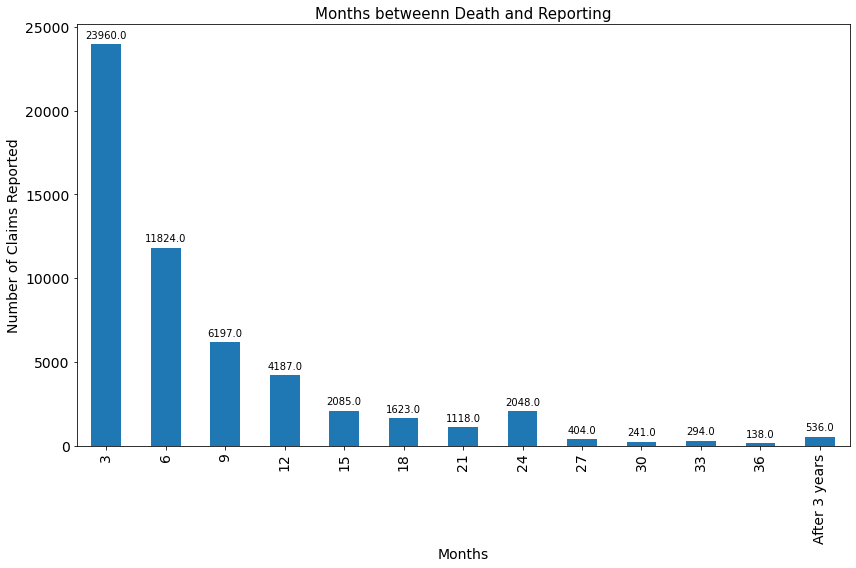

In [7]:
# Period between date of death and when death reported
dor = gl_claims.groupby(['reporting_delay'])['reporting_delay'].count()
print('Months betweenn Death and Reporting \n', dor)


plt.figure(figsize=(12,8))
ax = dor.plot(kind='bar', fontsize = 14)

ax.set_title('Months betweenn Death and Reporting', fontsize = 15)
ax.set_xlabel('Months', fontsize = 14)
ax.set_ylabel('Number of Claims Reported', fontsize = 14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()

# Period between date of death of when claim is paid

Months between Death and Payment of Claims 
 payment_delay
3                 13421
6                  8667
9                 17729
12                 3938
15                 2764
18                 1403
21                  975
24                 1973
27                  381
After 2.25 yrs     3404
Name: payment_delay, dtype: int64


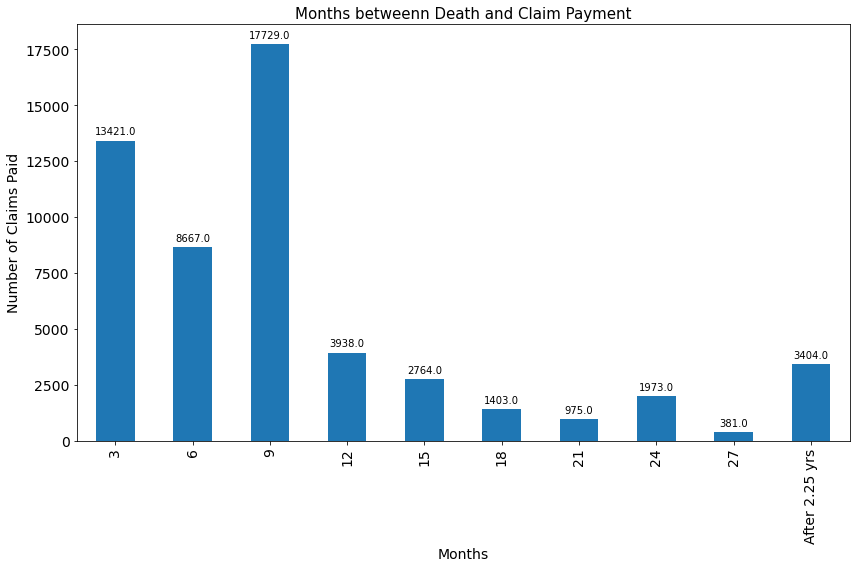

In [8]:
# Period between date of death of when claim is paid
dop = gl_claims.groupby(['payment_delay'])['payment_delay'].count()
print('Months between Death and Payment of Claims \n', dop)

plt.figure(figsize=(12,8))
ax = dop.plot(kind='bar', fontsize = 14)

ax.set_title('Months betweenn Death and Claim Payment', fontsize = 15)
ax.set_xlabel('Months', fontsize = 14)
ax.set_ylabel('Number of Claims Paid', fontsize = 14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()


 # Use a pie chart to get more details about claim payments

Text(0, 0.5, '')

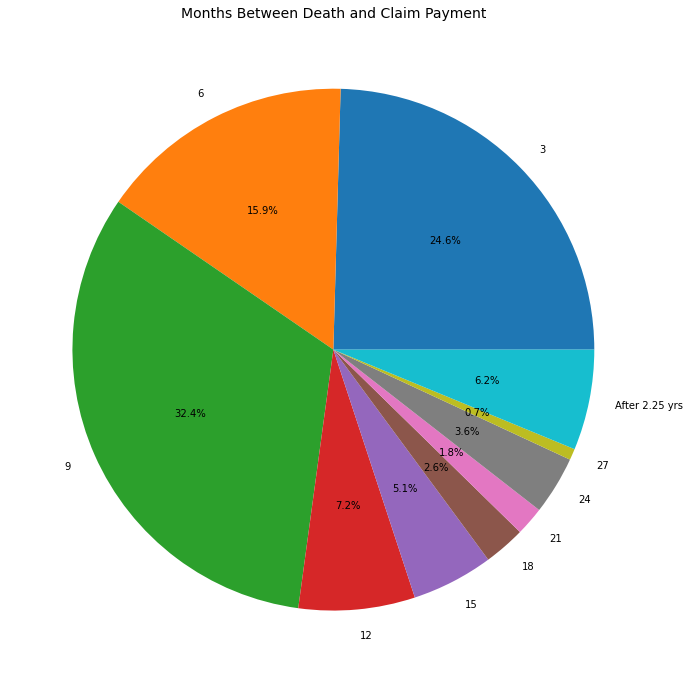

In [9]:
# Use a pie chart to get more details about the payment claim payments

plt.figure(figsize=(12,12))
ax = dop.plot(kind= 'pie', autopct='%1.1f%%', fontsize = 10)
ax.set_title('Months Between Death and Claim Payment', fontsize = 14)
ax.set_ylabel('')


# Types of Claims

Most Popular Policy Types 
 Policy_Type
Group Life                                                 25919
Last Expense                                               13359
TERM LIFE                                                   7998
Group Credit                                                1021
GROUP LAST EXPENSE                                           854
GROUP TERM LIFE UNIT RATE                                    681
Group Credit SP                                              666
Group Last Expense                                           643
EB Group Life Cover                                          579
CL                                                           561
GROUP CREDIT                                                 475
LIFE                                                         357
Credit Life                                                  281
GROUP CREDIT LIFE                                            193
Last Expense                                      

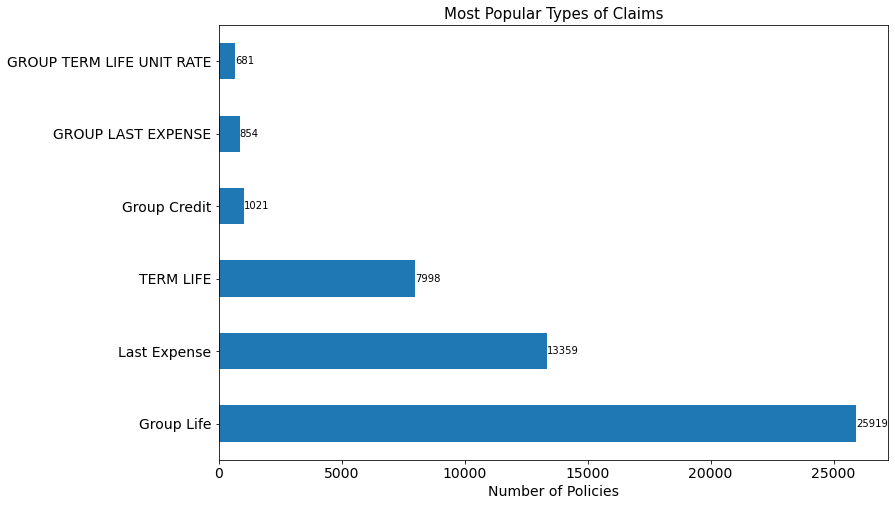

In [10]:
# Replace claim types with the same meaning
gl_claims['Policy_Type'] = gl_claims['Policy_Type'].replace(['LAST EXPENSE', 'LE', 'FUNERAL EXPENSE'],'Last Expense')
gl_claims['Policy_Type'] = gl_claims['Policy_Type'].replace(['GROUP LIFE', 'GROUP LIFE ASSURANCE', 'GL', 'Group life', 
                                                             'GL ', 'GLS'],
                                                            'Group Life')

# gl_claims['Policy_Type'] = gl_claims['Policy_Type'
#                                  ].replace()

# Types of claims (pie chart)

claims = gl_claims.groupby(['Policy_Type'])['Policy_Type'].count().sort_values(ascending = False)
print('Most Popular Policy Types \n', claims)

plt.figure(figsize=(12,8))
ax = claims[:6].plot(kind='barh', fontsize = 14)

ax.set_title('Most Popular Types of Claims', fontsize = 15)
ax.set_xlabel('Number of Policies', fontsize = 14)
ax.set_ylabel('')

for i, v in enumerate(claims[:6]):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

# Sum Assured Bands

count     54655
unique        9
top       <100k
freq      18504
Name: sum_assured_levels, dtype: object
Sum Assured Bands 
 sum_assured_levels
<100k        18504
100k-200k    13411
1M-1.5M       9202
200k-500k     7489
500k-1M       2706
Over 3M       1809
1.5M-2M        643
2M-2.5M        544
2.5M-3M        347
Name: sum_assured_levels, dtype: int64


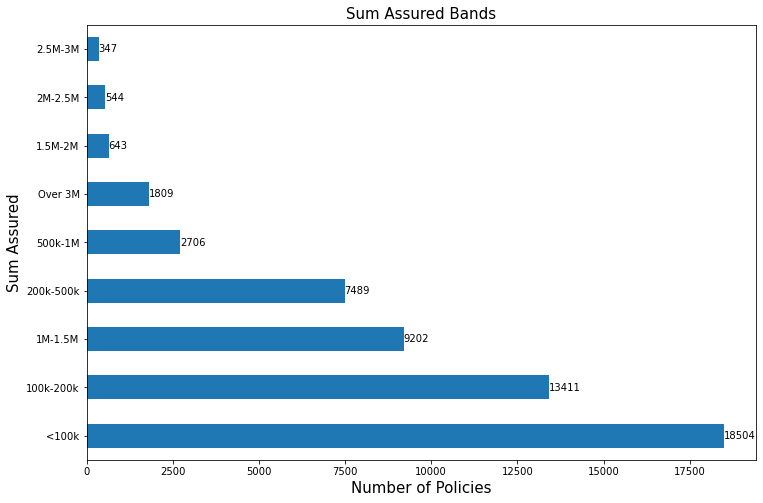

In [11]:
# Create Sum Assured
bins = [0,100000, 200000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 100000000]
labels = ['<100k', '100k-200k', '200k-500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', 'Over 3M']
gl_claims ['sum_assured_levels'] = pd.cut(gl_claims['sum_assured'], bins = bins, labels=labels, right = False )
print(gl_claims ['sum_assured_levels'].describe())

sum_assured = gl_claims.groupby(['sum_assured_levels'])['sum_assured_levels'].count().sort_values(ascending = False)
print('Sum Assured Bands \n', sum_assured)
plt.figure(figsize=(12,8))
ax = sum_assured.plot(kind='barh')

ax.set_title('Sum Assured Bands',fontsize = 15)
ax.set_xlabel('Number of Policies',fontsize = 15)
ax.set_ylabel('Sum Assured',fontsize = 15)

for i, v in enumerate(sum_assured):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

In [12]:
gl_claims.to_csv(r'combined_csv/group_life_claims.csv')